#### Hands-on exercise
#### Fit a classifier on the wine dataset with GridSearchCV. Follow the example on https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [10]:
# loading required packages

!pip install mglearn
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from IPython.display import display

from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['lines.linewidth'] = 5.0
plt.rcParams['lines.markersize'] = 15.0

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

# Simple Grid Search

In [11]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

Xw, yw = load_wine(return_X_y=True)

Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, random_state=0)
print("Size of training set: {} size of test set: {}".format(Xw_train.shape[0], Xw_test.shape[0]))

Size of training set: 133 size of test set: 45


In [12]:
# naive grid search implementation
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(Xw_train, yw_train)
        # evaluate the SVC on the test set
        score = svm.score(Xw_test, yw_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.84
Best parameters: {'C': 10, 'gamma': 0.001}


# Overfiting parameters and the Validation Set

In [13]:
from sklearn.svm import SVC

# split data into train+validation set and test set
Xw_trainval, Xw_test, yw_trainval, yw_test = train_test_split(Xw, yw, random_state=0)

# split train+validation set into training and validation sets
Xw_train, Xw_valid, yw_train, yw_valid = train_test_split(Xw_trainval, yw_trainval, random_state=1)

print("Size of training set: {} size of validation set: {} size of test set:" 
      " {}\n".format(Xw_train.shape[0], Xw_valid.shape[0], Xw_test.shape[0]))

Size of training set: 99 size of validation set: 34 size of test set: 45



In [14]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(Xw_train, yw_train)
        # evaluate the SVC on the test set
        score = svm.score(Xw_valid, yw_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

In [15]:
# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(Xw_trainval, yw_trainval)
test_score = svm.score(Xw_test, yw_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.79
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.84


# Grid Search with Cross-Validation

In [16]:
from sklearn.model_selection import cross_val_score

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, Xw_trainval, yw_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

In [17]:
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(Xw_trainval, yw_trainval)

test_score = svm.score(Xw_test, yw_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.79
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.84


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,120],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, random_state=0)
grid_search.fit(Xw_train, yw_train)

print("Test set score: {:.2f}".format(grid_search.score(Xw_test, yw_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.82
Best parameters: {'C': 120, 'gamma': 0.001}
Best cross-validation score: 0.75

Best estimator:
SVC(C=120, gamma=0.001)


#### Analyzing the results (cv ⎯ results ⎯ )
#### We can inspect the results of the cross-validated grid search.

In [21]:
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002513,0.000512,0.001060,0.000644,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.37037,0.37037,0.37037,0.384615,0.384615,0.376068,0.006979,11
1,0.002090,0.000703,0.001377,0.000450,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.37037,0.37037,0.37037,0.384615,0.384615,0.376068,0.006979,11
2,0.002406,0.000797,0.001184,0.000440,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.37037,0.37037,0.37037,0.384615,0.384615,0.376068,0.006979,11
3,0.002117,0.000448,0.001005,0.000034,0.001,1,"{'C': 0.001, 'gamma': 1}",0.37037,0.37037,0.37037,0.384615,0.384615,0.376068,0.006979,11
4,0.002871,0.000710,0.001371,0.000570,0.001,10,"{'C': 0.001, 'gamma': 10}",0.37037,0.37037,0.37037,0.384615,0.384615,0.376068,0.006979,11


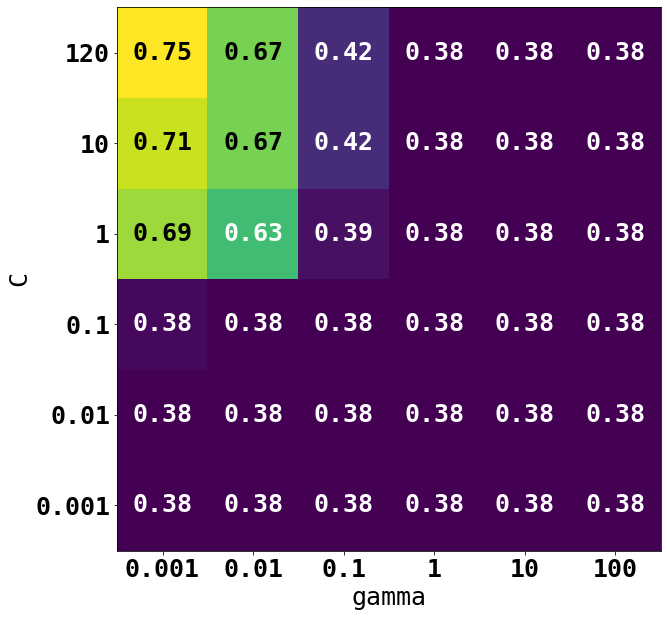

In [22]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

In [23]:
param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma': np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma': np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma': np.logspace(-7, -2, 6)}

In [28]:
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 18}
rc('font', **font) 
plt.rcParams['figure.figsize'] = [35, 10]

def plot_params():
    fig, axes = plt.subplots(1, 3)
    for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                               param_grid_range], axes):
        grid_search = GridSearchCV(SVC(), param_grid, cv=5)
        grid_search.fit(Xw_train, yw_train)
        scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

        # plot the mean cross-validation scores
        scores_image = mglearn.tools.heatmap(
                       scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
                       yticklabels=param_grid['C'], cmap="viridis", ax=ax)
    plt.colorbar(scores_image, ax=axes.tolist())

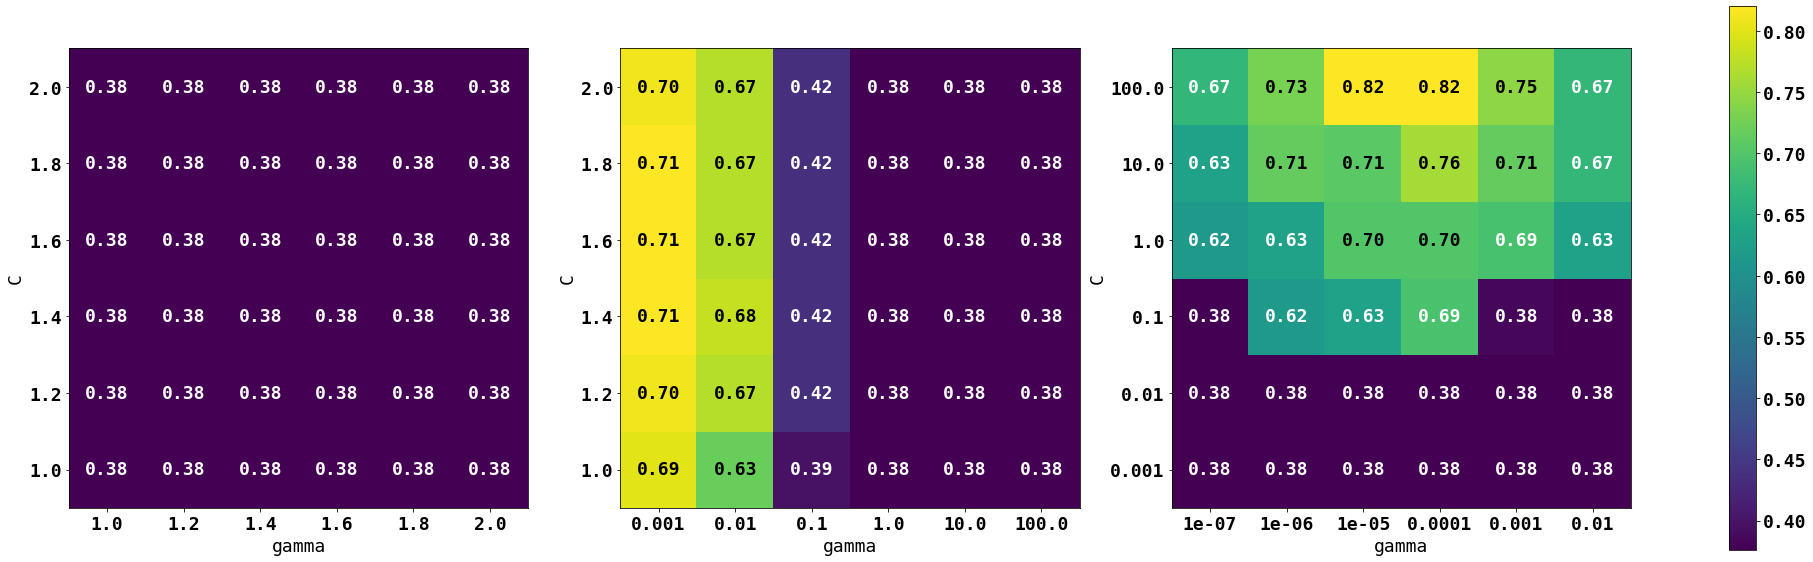

In [29]:
plot_params()

In [30]:
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 
plt.rcParams['figure.figsize'] = [25, 10]

In [32]:
### Search over spaces (not grids)

# We test the SVC classifier with two type of kernels.
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(Xw_train, yw_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best cross-validation score: 0.96


In [33]:
results = pd.DataFrame(grid_search.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.001338,0.002279,0.001594,0.002315,0.002569,0.002198,0.001531,0.001814,0.002073,0.001965,...,0.001538,0.003262,0.001808,0.002465,0.001324,0.005884,0.027155,0.055981,0.113898,0.110005
std_fit_time,0.000426,0.000535,0.000487,0.000767,0.000471,0.000385,0.000469,0.000393,0.000995,0.00049,...,0.000396,0.001125,0.000406,0.000405,0.000465,0.003183,0.01201,0.006075,0.059698,0.064254
mean_score_time,0.001055,0.001016,0.000598,0.001073,0.001283,0.001396,0.001038,0.000589,0.00076,0.001038,...,0.000874,0.001393,0.001192,0.001277,0.000304,0.000675,0.000915,0.000652,0.000812,0.00051
std_score_time,0.000088,0.000615,0.000489,0.000188,0.000381,0.000524,0.000514,0.000481,0.000398,0.000539,...,0.000469,0.000495,0.000256,0.000766,0.00036,0.000364,0.00047,0.000541,0.000406,0.000446
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.37037,0.37037,0.37037,0.37037,0.37037,0.37037,0.37037,0.37037,0.37037,0.37037,...,0.444444,0.37037,0.37037,0.37037,0.740741,0.777778,0.925926,0.925926,0.888889,0.888889
split1_test_score,0.37037,0.37037,0.37037,0.37037,0.37037,0.37037,0.37037,0.37037,0.37037,0.37037,...,0.407407,0.37037,0.37037,0.37037,0.777778,0.925926,0.962963,0.962963,0.962963,0.962963


##### Here we explore the pipeline class.
##### Create a pipeline class combining one scaler and one model.
##### Run a gridsearch with this pipeline on the wine dataset.

In [4]:
# Pipeline and GridSearchCV Classes

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_wine

Xw, yw = load_wine(return_X_y=True)

Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, random_state=0)

# compute minimum and maximum on the training data
scaler = MinMaxScaler().fit(Xw_train)

# rescale the training data
Xw_train_scaled = scaler.transform(Xw_train)

svm = SVC()

# learn an SVM on the scaled training data
svm.fit(Xw_train_scaled, yw_train)
#svm.fit(X_train, y_train)

# scale the test data and score the scaled data
Xw_test_scaled = scaler.transform(Xw_test)
print("Test score: {:.2f}".format(svm.score(Xw_test_scaled, yw_test)))

Test score: 1.00


In [6]:
## Parameter Selection with Preprocessing
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(Xw_train_scaled, yw_train)

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Best set score: {:.2f}".format(grid.score(Xw_test_scaled, yw_test)))
print("Best parameters: ", grid.best_params_)

Best cross-validation accuracy: 0.97
Best set score: 1.00
Best parameters:  {'C': 1, 'gamma': 1}


In [7]:
# The *Pipeline* Class
from sklearn.pipeline import Pipeline

pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

pipe.fit(Xw_train, yw_train)
print("Test score: {:.2f}".format(pipe.score(Xw_test, yw_test)))

Test score: 1.00


In [8]:
## Pipelines in Grid Searches
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
               'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(Xw_train, yw_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(Xw_test, yw_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.98
Test set score: 1.00
Best parameters: {'svm__C': 1, 'svm__gamma': 1}


In [9]:
## Pipeline Creation with make_pipeline
from sklearn.pipeline import make_pipeline
# standard syntax
pipe_long = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(C=100))])
# abbreviated syntax
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

print("Pipeline steps:\n{}".format(pipe_short.steps))

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
print("Pipeline steps:\n{}".format(pipe.steps))


Pipeline steps:
[('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=100))]
Pipeline steps:
[('standardscaler-1', StandardScaler()), ('pca', PCA(n_components=2)), ('standardscaler-2', StandardScaler())]
